In [61]:
import numpy as np
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from scipy.stats import wasserstein_distance

import matplotlib.pyplot as plt
import seaborn as sns
from selfpeptide.utils.beta_distr_utils import *

In [2]:

def eval_regression_metrics(targets, predictions):
    if isinstance(targets, list):
        targets = np.array(targets)
    if isinstance(predictions, list):
        predictions = np.array(predictions)
    metrics = {}
    metrics["PearsonR"] = np.corrcoef(targets, predictions)[0,1]
    metrics["R^2"] = r2_score(targets, predictions)
    metrics["RMSE"] = np.sqrt(np.mean(np.square(predictions - targets)))
    metrics["MAE"] = mean_absolute_error(targets, predictions)
    metrics["MdAE"] = median_absolute_error(targets, predictions)

    return metrics


In [3]:
targets = [0.4, 0.2, 0.98, 0.75,0.2]
predictions = [0.3, 0.1, 0.6, 0.8, 0.4]

eval_regression_metrics(targets, predictions)

{'PearsonR': 0.7852146739982895,
 'R^2': 0.5713871395425918,
 'RMSE': 0.20342074623793907,
 'MAE': 0.166,
 'MdAE': 0.10000000000000003}

In [4]:
(0.7852146739982895)**2

0.61656208426224

In [86]:
def eval_beta_metrics(target_means, target_precisions, pred_means, pred_precisions, n_samples=1000):
    if isinstance(target_means, list):
        target_means = np.array(target_means)
    if isinstance(target_precisions, list):
        target_precisions = np.array(target_precisions)
    if isinstance(pred_means, list):
        pred_means = np.array(pred_means)
    if isinstance(pred_precisions, list):
        pred_precisions = np.array(pred_precisions)
    target_alphas, target_betas, target_vars, target_modes = beta_distr_params_from_mean_precision(target_means, target_precisions)
    pred_alphas, pred_betas, pred_vars, pred_modes = beta_distr_params_from_mean_precision(pred_means, pred_precisions)
    
    pred_samples = []
    for s in range(n_samples):
        pred_samples.append(np.random.beta(pred_alphas, pred_betas))
    pred_samples = np.vstack(pred_samples)
    
    target_samples = []
    for s in range(n_samples):
        target_samples.append(np.random.beta(target_alphas, target_betas))
    target_samples = np.vstack(target_samples)
    
    metrics = {}
    metrics["Forward_KL"] = torch.mean(beta_kl_divergence(target_alphas, target_betas, pred_alphas, pred_betas)).item()
    metrics["Reverse_KL"] = torch.mean(beta_kl_divergence(pred_alphas, pred_betas, target_alphas, target_betas)).item()
    metrics["Bhattacharyya_Distance"] = torch.mean(beta_chernoff_distance(pred_alphas, pred_betas, target_alphas, target_betas, lbd=0.5)).item()
    
    metrics["WeightedMRS"] = np.mean(np.square(target_means - pred_means)/pred_vars)
    
    wds = [wasserstein_distance(pred_samples[:,i], target_samples[:,i]) for i in range(pred_samples.shape[-1])]
    metrics["WassersteinDistance"] = np.mean(wds)
    return metrics

In [98]:
pred_means =[0.9070, 0.3524, 0.3729, 0.7325, 0.6505, 0.8319, 0.9680, 0.9367, 0.4457,
        0.9586]
pred_precisions = [ 7.4825,  4.8193,  5.5152,  5.1689,  4.8091,  7.1383,  4.3311,  5.7508,
         3.7293, 13.8320]

target_means = [0.3333, 0.1667, 0.8333, 0.2500, 0.2500, 0.5000, 0.2500, 0.3333, 0.2500,
         0.2000]

target_precisions = [3., 6., 6., 4., 4., 4., 4., 3., 4., 5.]

metrics = eval_beta_metrics(target_means, target_precisions, pred_means, pred_precisions)
metrics

{'Forward_KL': 6.031155520114391,
 'Reverse_KL': 5.627128505813163,
 'Bhattacharyya_Distance': 1.0516661935003042,
 'WeightedMRS': 40.37061653274814,
 'WassersteinDistance': 0.4703222410609197}

In [70]:
pred_alphas, pred_betas, pred_vars, pred_modes = beta_distr_params_from_mean_precision(pred_means, pred_precisions)
n_samples=200
pred_samples = []
for s in range(n_samples):
    pred_samples.append(np.random.beta(pred_alphas, pred_betas))
pred_samples = np.vstack(pred_samples)

In [71]:
pred_samples

array([[0.97834703, 0.49012252, 0.718611  , ..., 0.74473967, 0.29515488,
        0.99016592],
       [0.98854621, 0.5142035 , 0.74046566, ..., 0.98614833, 0.77871444,
        0.99869347],
       [0.92376854, 0.33906873, 0.45763618, ..., 0.8727254 , 0.56460602,
        0.97601619],
       ...,
       [0.9994239 , 0.34574752, 0.3347849 , ..., 0.98542648, 0.51066924,
        0.84199471],
       [0.69385364, 0.27325256, 0.71073032, ..., 0.93311014, 0.4677301 ,
        0.99914969],
       [0.99858404, 0.29281776, 0.53508655, ..., 0.96292212, 0.12068095,
        0.93909103]])

In [59]:
samples = []
for i in range(200):
    samples.append(np.random.beta([1, 20, 100], [2, 2, 2]))
samples = np.vstack(samples)
samples

array([[4.59192669e-01, 9.68031711e-01, 9.94892908e-01],
       [1.02904125e-01, 8.23460266e-01, 9.85203376e-01],
       [1.64637670e-01, 9.78703659e-01, 9.85527456e-01],
       [4.33397338e-01, 8.79416280e-01, 9.75174851e-01],
       [6.72804964e-01, 9.19222403e-01, 9.77147178e-01],
       [5.39672944e-01, 9.55210447e-01, 9.96376355e-01],
       [8.20435585e-01, 9.58541925e-01, 9.90626601e-01],
       [7.46803233e-03, 9.39056095e-01, 9.86267983e-01],
       [2.80604566e-01, 9.89305244e-01, 9.80696368e-01],
       [4.14330643e-01, 9.25542434e-01, 9.88750950e-01],
       [6.91925926e-01, 9.31718355e-01, 9.65653119e-01],
       [2.98314426e-02, 8.83445532e-01, 9.85719162e-01],
       [5.55591391e-01, 9.78114273e-01, 9.91710422e-01],
       [8.30785899e-01, 8.42689191e-01, 9.80548716e-01],
       [5.13605043e-01, 9.67493854e-01, 9.86941963e-01],
       [8.04199396e-01, 7.98742181e-01, 9.79105864e-01],
       [4.49065349e-01, 9.04505978e-01, 9.80844463e-01],
       [5.45634344e-01, 9.48542

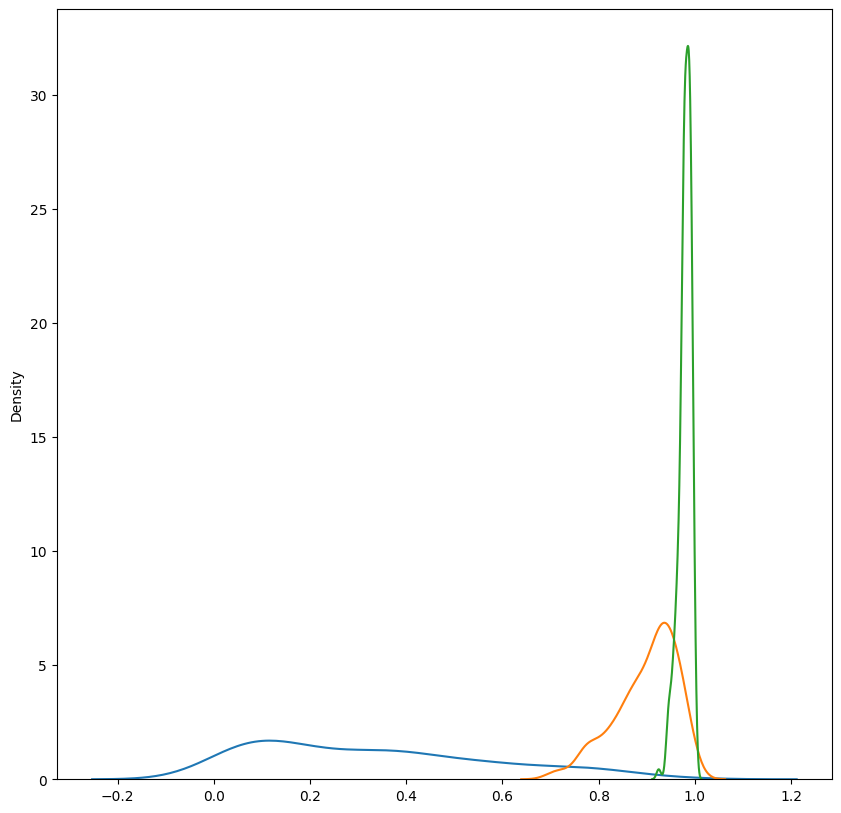

In [60]:
fig, ax  = plt.subplots(figsize=(10,10))
for i in range(samples.shape[-1]):
    sns.kdeplot(samples[:,i], ax=ax)
plt.show()